<a href="https://colab.research.google.com/github/finesketch/data_science/blob/main/Python_Data_Science_Handbook/05_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 5 : Machine Learning

Machine learning is where these computational and algorithmic skills of data science meet the statistical thinking of data science, and the result is a collection of approaches to inference and data exploration that are not about effective theory so much as effective computation.

> Reference: https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.00-Machine-Learning.ipynb


In [1]:
import numpy as np
import pandas as pd

print(np.__version__)
print(pd.__version__)

1.19.5
1.1.5


### Introducing Scikit-Learn

There are several Python libraries that provide solid implementations of a range of machine learning algorithms. One of the best known is Scikit-Learn, a package that provides efficient versions of a large number of common algorithms. Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

> Reference: https://github.com/jakevdp/PythonDataScienceHandbook/blob/8a34a4f653bdbdc01415a94dc20d4e9b97438965/notebooks/05.02-Introducing-Scikit-Learn.ipynb

#### Data Representation in Scikit-Learn

The best way to think about data within Scikit-Learn is in terms of tables of data.

##### Data as Table

A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements.

In [2]:
import seaborn as sns

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
type(iris)

pandas.core.frame.DataFrame

Here each row of the data refers to a single observed flower, and the number of rows is the total number of flowers in the dataset. In general, we will refer to the rows of the matrix as samples, and the number of rows as **n_samples**.

each column of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix as features, and the number of columns as **n_features**.

### Feature Matrix

This table layout makes clear that the information can be thought of as a two-dimensional numerical array or matrix, which we will call the features matrix. By convention, this features matrix is often stored in a variable named X. The features matrix is assumed to be two-dimensional, with shape [n_samples, n_features].

The samples (i.e., rows) always refer to the individual objects described by the dataset.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner. 

### Target Array

In addition to the feature matrix X, we also generally work with a label or target array, which by convention we will usually call y. The target array is usually one dimensional, with length n_samples, and is generally contained in a NumPy array or Pandas Series. The target array may have continuous numerical values, or discrete classes/labels. 

While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional [n_samples, n_targets] target array, we will primarily be working with the common case of a one-dimensional target array.

The distinguishing feature of the target array is that it is usually the quantity we want to predict from the data: in statistical terms, it is the **dependent variable**.

For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the species column would be considered the feature.


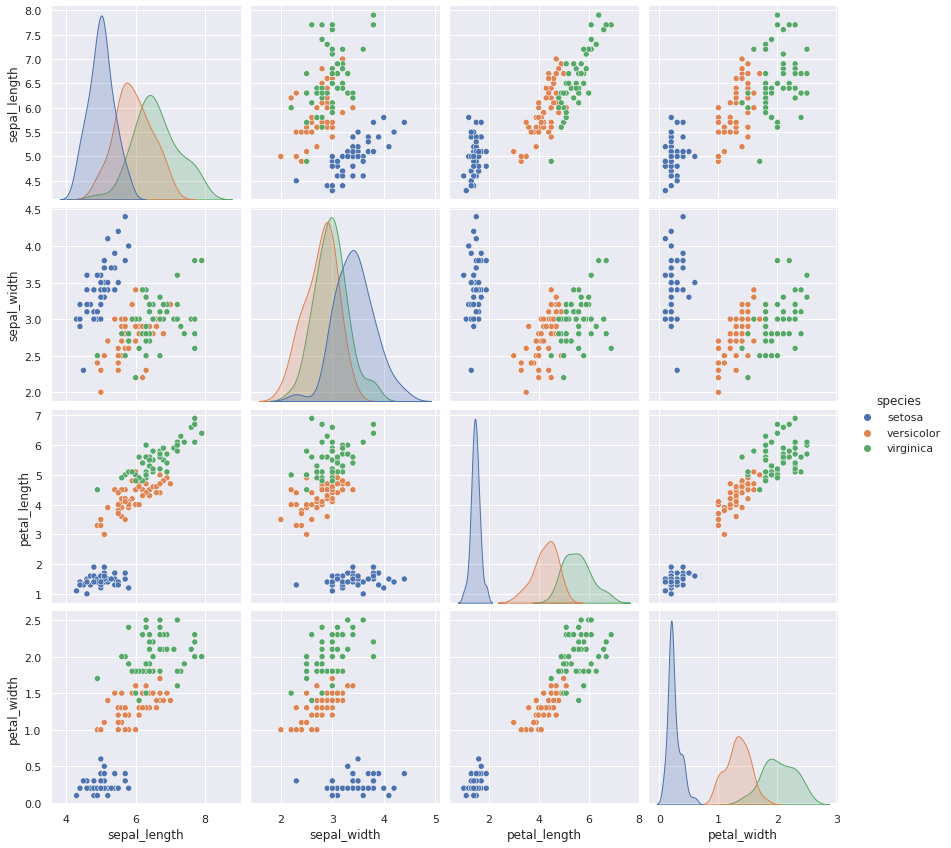

In [4]:
import seaborn as sns
sns.set()

sns.pairplot(iris, hue='species', height=3)

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

### Basics of Scikit-Learn's Estimator API

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion from before.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
  - For supervised learning, often we predict labels for unknown data using the predict() method.
  - For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.


### Supervised Learning Example: Simple Linear Regression



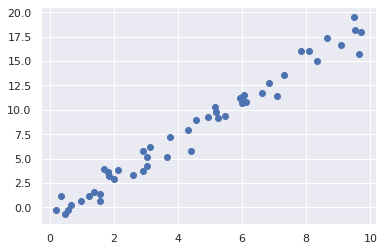

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

type(x): <class 'numpy.ndarray'>
x.shape: (50,)
type(X): <class 'numpy.ndarray'>
X.shape: (50, 1)

model.coef_: [1.9776566]
model.intercept_: -0.9033107255311146



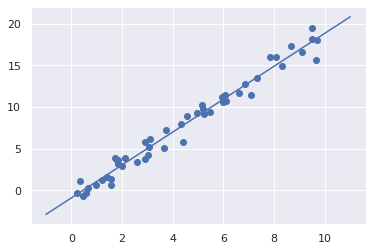

In [8]:
# 1. choose a class of model

from sklearn.linear_model import LinearRegression

# 2. choose model hyperparameters
# - how to fit for the offset (i.e., intercept)?
# - how to be normalized?
# - how to preprocess our features to add model flexibility?
# - what about degree of regularization to use in the model?
# - how many model components would we like to use?
# In Scikit-Learn, the hyperparameters is passed at model instantiation. 

model = LinearRegression(fit_intercept=True)
print(f'model: {model}')
print()

# 3. arrange data into a features matrix and target vector.

X = x[:, np.newaxis]
print(f'type(x): {type(x)}')
print(f'x.shape: {x.shape}')
print(f'type(X): {type(X)}')
print(f'X.shape: {X.shape}')
print()

# 4. fit the model to your data.
# - This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.
# use "statsmodels" to deep dive: https://www.statsmodels.org/stable/index.html

model.fit(X, y)
print(f'model.coef_: {model.coef_}') # slope of simple linear fit to the data, closed to "2"
print(f'model.intercept_: {model.intercept_}') # intercept of simple linear fit to the data, closed to "-1"
print()

# 5. predict labels for unknown data.

xfit = np.linspace(-1, 11) # use diagram above to pick the "start" and "stop" values

Xfit = xfit[:, np.newaxis] # we need to coerce these x values into a [n_samples, n_features] features matrix
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit)


### Supervised Learning Example: IRIS classification

Gaussian naive Bayes is often a good model to use as a baseline classification, before you explore whether improvements can be found through more sophisticated models.

> Reference: **In Depth: Naive Bayes Classification**, https://learning.oreilly.com/library/view/python-data-science/9781491912126/ch05.html#in-depth-naive-bayes-classification

Let's split the data into a training set and a testing set.

In [9]:
# split the data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

# predict
from sklearn.naive_bayes import GaussianNB  # 1. choose model class
model = GaussianNB()                        # 2. instantiate model
model.fit(Xtrain, ytrain)                   # 3. fit model to data
y_model = model.predict(Xtest)              # 4. predict on new data

# use the accuracy_score utility to see the fraction of predicted labels that match their true value
from sklearn.metrics import accuracy_score
print(f'accuracy_score(ytest, y_model): {accuracy_score(ytest, y_model)}')

# With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

accuracy_score(ytest, y_model): 0.9736842105263158


### Unsupervised Learning Example: Iris Dimensionality

let’s take a look at reducing the dimensionality of the Iris data. Recall that the Iris data is four dimensional: there are four features recorded for each sample.

Here we will use **Principal Component Analysis (PCA)**, which is a fast linear dimensionality reduction technique. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


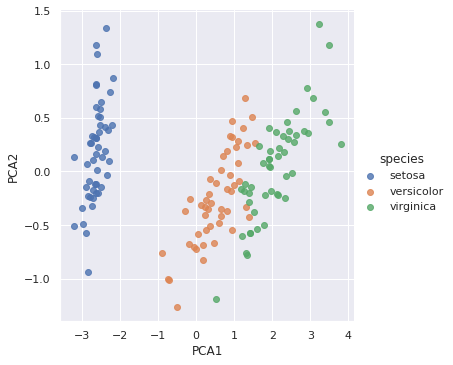

In [10]:
from sklearn.decomposition import PCA     # 1. choose the model class
model = PCA(n_components=2)               # 2. instantiate the model with hyperparameters
model.fit(X_iris)                         # 3. fit to data, notice y is not specified (unsupervised)
X_2D = model.transform(X_iris)            # 4. transform the data to two dimensions

# load into DataFrame
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

# use seaborn's implot
sns.lmplot('PCA1', 'PCA2', hue='species', data=iris, fit_reg=False)

### Unsupervised Learning Example: Iris Clustering

Let’s next look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a *powerful* clustering method called a **Gaussian mixture model** (GMM). A GMM attempts to model the data as a collection of Gaussian blobs.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


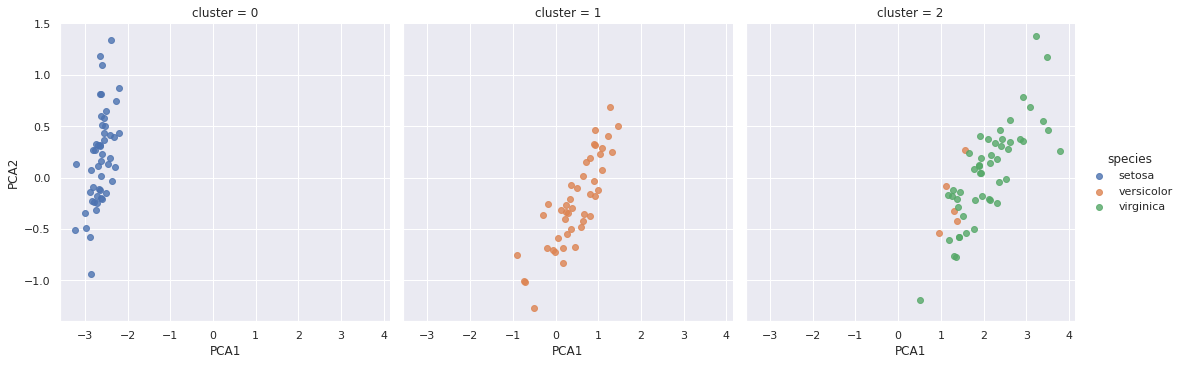

In [11]:
from sklearn.mixture import GaussianMixture           # 1. choose the model class
model = GaussianMixture(n_components=3, covariance_type='full')   # 2. instantiate the model with hyperparameters
model.fit(X_iris)                                     # 3. fit to data, notice y is not specificed (unsupervised)
y_gmm = model.predict(X_iris)                         # 4. determine cluster labels

# load into DataFrame
iris['cluster'] = y_gmm

# use seaborn's lmplot
sns.lmplot('PCA1', 'PCA2', data=iris, hue='species', col='cluster', fit_reg=False)

In [12]:
iris.loc[iris['cluster'] == 0].head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397,0
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001,0
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949,0
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299,0
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755,0


In [13]:
iris.loc[iris['cluster'] == 1].head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
50,7.0,3.2,4.7,1.4,versicolor,1.284826,0.685160,1
51,6.4,3.2,4.5,1.5,versicolor,0.932489,0.318334,1
52,6.9,3.1,4.9,1.5,versicolor,1.464302,0.504263,1
53,5.5,2.3,4.0,1.3,versicolor,0.183318,-0.827959,1
54,6.5,2.8,4.6,1.5,versicolor,1.088103,0.074591,1


In [14]:
iris.loc[iris['cluster'] == 2].head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2,cluster
68,6.2,2.2,4.5,1.5,versicolor,0.944734,-0.543146,2
70,5.9,3.2,4.8,1.8,versicolor,1.116283,-0.084617,2
72,6.3,2.5,4.9,1.5,versicolor,1.298184,-0.327787,2
77,6.7,3.0,5.0,1.7,versicolor,1.557802,0.267495,2
83,6.0,2.7,5.1,1.6,versicolor,1.380026,-0.420954,2


In [15]:
iris['cluster'].unique()

array([0, 1, 2])

## Application: Exploring Handwritten Digits

To demonstrate these principles on a more interesting problem, let’s consider one piece of the optical character recognition problem: the identification of handwritten digits. In the wild, this problem involves both locating and identifying characters in an image. Here we’ll take a shortcut and use Scikit-Learn’s set of preformatted digits, which is built into the library.

### Loading and Visualizing the Digits Data

In [16]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape # 3-dimensional array: 1797 samples, 8x8 grid of pixels from each sample image

(1797, 8, 8)

In [17]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

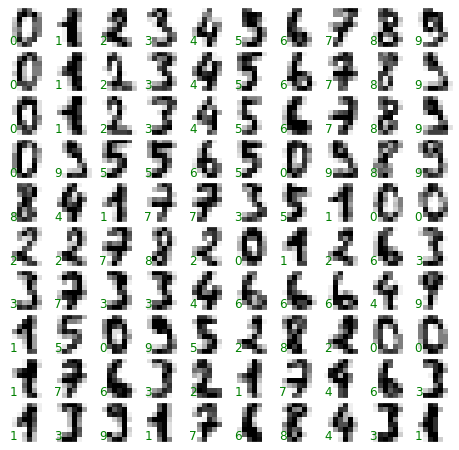

In [18]:
# visualize the images

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, 
                        figsize=(8,8), 
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
  ax.text(0.05, 0.05, 
          str(digits.target[i]), 
          transform=ax.transAxes, 
          color='green')

In [19]:
axes.shape

(10, 10)

In [20]:
# training samples for X
X = digits.data
X.shape # (1797, 64) or flatten of (1797, 8x8)

# or 1797 samples and 64 features

(1797, 64)

In [21]:
# training labels for y
y = digits.target
y.shape # (1797,)

(1797,)

### Unsupervised Learning: Dimensionality Reduction

We’d like to visualize our points within the 64-dimensional parameter space, but it’s difficult to effectively visualize points in such a high-dimensional space. Instead we’ll reduce the dimensions to 2, using an unsupervised method. Here, we’ll make use of a manifold learning algorithm called **Isomap**, and transform the data to two dimensions:


In [22]:
from sklearn.manifold import Isomap           # 1. choose the model class
iso = Isomap(n_components=2)                  # 2. instantiate the model with hyperparameters
iso.fit(digits.data)                          # 3. fit to data
data_projected = iso.transform(digits.data)   # 4. transform the data to two dimensions

data_projected.shape # (1797, 2)

(1797, 2)

In [23]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [24]:
data_projected[0]

array([167.27247954,  22.18515653])

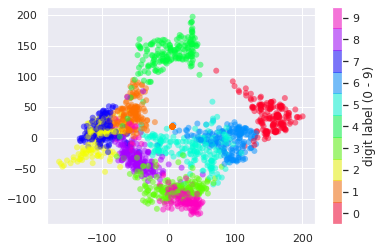

In [25]:
plt.scatter(data_projected[:, 0], 
            data_projected[:, 1], 
            c=digits.target,
            edgecolor='none', 
            alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10)) # https://gallantlab.github.io/colormaps.html
plt.colorbar(label='digit label (0 - 9)', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on Digits

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model) # about 83.33% accuracy

0.8333333333333334

use the **confusion matrix**, which we can compute with Scikit-Learn and plot with Seaborn.

Text(89.18, 0.5, 'test value')

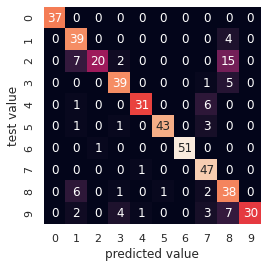

In [30]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model) # compare both model and test

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('test value')

*This shows us where the mislabeled points tend to be: for example, a large number of twos here are misclassified as either **ones** or **eights**.*

Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We’ll use **green** for correct labels, and **red** for incorrect labels.

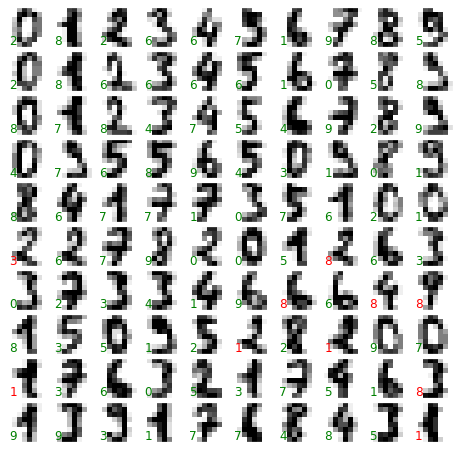

In [31]:
fig, axes = plt.subplots(10, 10,
                         figsize=(8,8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], 
            cmap='binary', 
            interpolation='nearest')
  ax.text(0.05, 0.05,
          str(y_model[i]),
          transform=ax.transAxes,
          color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might not be performing optimally. To go beyond our 80% classification rate, we might move to a more sophisticated algorithm, such as support vector machines (see “In-Depth: Support Vector Machines”) or random forests (see “In-Depth: Decision Trees and Random Forests”), or another classification approach.

## Hyperparameters and Model Validation

we need a way to validate that our model and our hyperparameters are a good fit to the data.


### Thinking About Model Validation

n principle, model validation is very simple: after choosing a model and its hyperparameters, we can estimate how effective it is by applying it to some of the training data and comparing the prediction to the known value.

#### Model Validation the **Wrong** Way

Let’s demonstrate the naive approach to validation using the Iris data, which we saw in the previous section. We will start by loading the data.

In [32]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

Next we choose a model and hyperparameters. Here we’ll use a **k-neighbors classifier** with **n_neighbors=1**. This is a very simple and intuitive model that says “the label of an unknown point is the same as the label of its closest training point”:

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [34]:
model.fit(X, y)
y_model = model.predict(X)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

We see an accuracy score of 1.0, which indicates that 100% of points were correctly labeled by our model! But is this truly measuring the expected accuracy? *Have we really come upon a model that we expect to be correct 100% of the time?*

- It trains and evaluates the model on the same data.

#### Model Validation the **Right** Way: Holdout Set

We hold back some subset of the data from the training of the model, and then use this holdout set to check the model performance.

In [37]:
from sklearn.model_selection import train_test_split

# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

#### Model Validation via Cross-Validation (Cross-Selection)

Use two validation trials, alternately using each half of the data as a holdout set. Using the split data from before, we could implement it like this.

In [39]:
# use X1 & y1 for y2_model
y2_model = model.fit(X1, y1).predict(X2)

# use X2 & y2 for y1_model
y1_model = model.fit(X2, y2).predict(X1)

# accuracy_scores for both
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

(0.96, 0.9066666666666666)

What comes out are two accuracy scores, which we could combine (by, say, taking the mean) to get a better measure of the global model performance. This particular form of cross-validation is a **two-fold cross-validation** -- one in which we have split the data into two sets and used each in turn as a validation set.

In [40]:
# split into 5 groups of train set
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

Repeating the validation across different subsets of the data gives us an even better idea of the performance of the algorithm.

Scikit-Learn implements a number of cross-validation schemes that are useful in particular situations; these are implemented via iterators in the cross_validation module. For example, we might wish to go to the extreme case in which our number of folds is equal to the number of data points; that is, we train on all points but one in each trial. This type of cross-validation is known as **leave-one-out** cross-validation, and can be used as follows.

> Reference: https://scikit-learn.org/stable/modules/cross_validation.html

In [41]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

# 150 samples, the leave-one-out cross-validation yields scores for 150 trials
# and the score indicates either successful (1.0) or unsuccessful (0.0) prediction.

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
scores.mean()

0.96

### Select the Best Model

if our estimator is underperforming, how should we move forward? There are several possible answers:

- use a more complicated/more flexible model
- use a less complicated/less flexible model
- gather more training samples
- gather more data to add features to each sample

**The ability to determine what steps will improve your model is what separates the successful machine learning practitioners from the unsuccessful.**

### The Bias-Variance Trade-Off

Fundamentally, the question of “the best model” is about finding a sweet spot in the trade-off between bias and variance. 

- underfit == high bias
- overfit == high variance

### Validation Surves in Scikit-Learn

Use polynomial regression model.

**y = a * x + b**

**y = ax^3 + bx^2 + cx + d**

We can generalize this to any number of polynomial features. In Scikit-Learn, we can implement this with a simple **linear regression** combined with the **polynomial preprocessor**. We will use a **pipeline** to string these operations together (we will discuss polynomial features and pipelines more fully in “Feature Engineering”):

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree),
                       LinearRegression(**kwargs))

# The special syntax **kwargs in function definitions in python is used to pass a keyworded, variable-length argument list. 
# We use the name kwargs with the double star. The reason is because the double star allows us to pass through keyword arguments (and any number of them).
# https://www.geeksforgeeks.org/args-kwargs-python/#:~:text=2.-,)**kwargs,and%20any%20number%20of%20them).


In [47]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
  # randomly sample the data
  rng = np.random.RandomState(rseed)
  X = rng.rand(N, 1) ** 2
  y = 10 - 1. / (X.ravel() + 0.1)  # https://numpy.org/doc/stable/reference/generated/numpy.ravel.html
  
  if err > 0:
    y += err * rng.randn(N)
  
  print(f'X.shape: {X.shape}')
  print(f'y.shape: {y.shape}')

  return X, y

X, y = make_data(40)

X.shape: (40, 1)
y.shape: (40,)


In [48]:
X.shape

(40, 1)

In [49]:
X.ravel().shape

(40,)

In [50]:
y.shape

(40,)

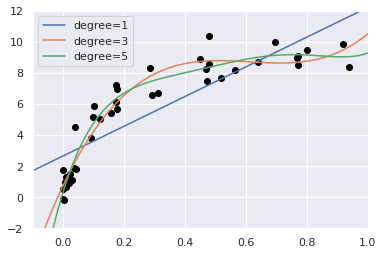

In [56]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis() # getting the range of both x-axis and y-axis

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');


In [57]:
axis

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

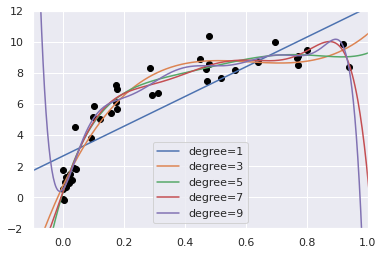

In [58]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis() # getting the range of both x-axis and y-axis

for degree in [1, 3, 5, 7, 9]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))

plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

train_score.shape: (21, 7)
train_score[3]: [0.92830604 0.93586649 0.93273606 0.95501615 0.91919623 0.92673491
 0.9402878 ]
val_score.shape: (21, 7)
val_score[3]: [0.92298132 0.83916959 0.92509741 0.7186875  0.96782936 0.95496284
 0.86925102]


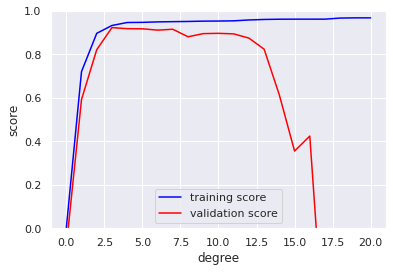

In [77]:
# validate

from sklearn.model_selection import validation_curve

degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)

print(f'train_score.shape: {train_score.shape}')
print(f'train_score[3]: {train_score[3]}')

print(f'val_score.shape: {val_score.shape}')
print(f'val_score[3]: {val_score[3]}')

plt.plot(degree, np.median(train_score, axis=1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, axis=1), color='red', label='validation score')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

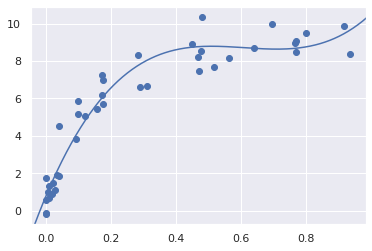

In [68]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

### Learning Curve

Use large dataset.

X.shape: (200, 1)
y.shape: (200,)


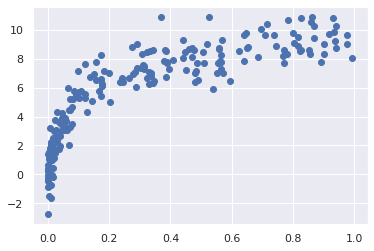

In [69]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

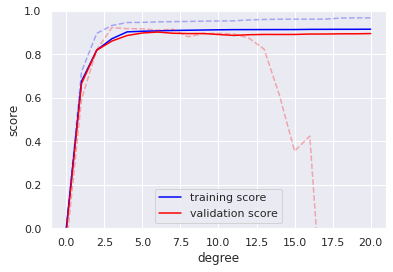

In [80]:
degree = np.arange(21)

train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')

plt.legend(loc='lower center')

plt.ylim(0, 1)

plt.xlabel('degree')
plt.ylabel('score');

In [81]:
train_score2.shape

(21, 7)

In [82]:
val_score2.shape

(21, 7)

The solid lines show the new results, while the fainter dashed lines show the results of the previous smaller dataset. It is clear from the validation curve that the larger dataset can support a much more complicated model: the peak here is probably around a degree of 6, but even a degree-20 model is not seriously overfitting the data—the validation and training scores remain very close.

The general behavior we would expect from a learning curve is this:

* A model of a given complexity will **overfit** a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
* A model of a given complexity will **underfit** a large dataset: this means that the training score will decrease, but the validation score will increase.
* A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

#### Learning Curves in Scikit-Learn

Scikit-Learn offers a convenient utility for computing such learning curves from your models; here we will compute a learning curve for our original dataset with a second-order polynomial model and a ninth-order polynomial.

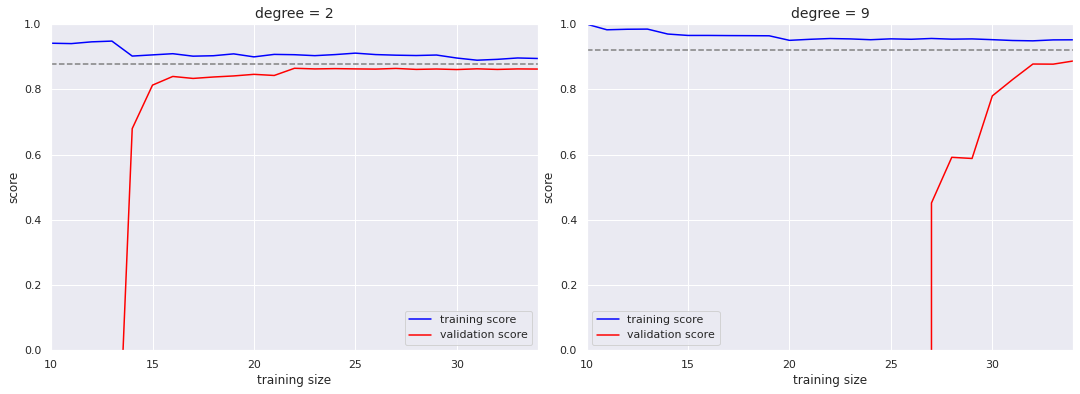

In [88]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
  N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))

  ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
  ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
  ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')

  ax[i].set_ylim(0, 1)
  ax[i].set_xlim(N[0], N[-1])
  ax[i].set_xlabel('training size')
  ax[i].set_ylabel('score')
  ax[i].set_title('degree = {0}'.format(degree), size=14)
  ax[i].legend(loc='best')

This is a valuable diagnostic, because it gives us a visual depiction of how our model responds to increasing training data. In particular, when your learning curve has already converged (i.e., when the training and validation curves are already close to each other), **adding more training data will not significantly improve the fit!** This situation is seen in the left panel, with the learning curve for the degree-2 model.

The only way to increase the converged score is to use a different (usually more complicated) model. We see this in the right panel: by moving to a much more complicated model, we increase the score of convergence (indicated by the dashed line), but at the expense of higher model variance (indicated by the difference between the training and validation scores). If we were to add even more data points, the learning curve for the more complicated model would eventually converge.

### Validation in Practice : Grid Search

Scikit-Learn provides automated tools to do this in the **grid_search** module. Here is an example of using grid search to find the optimal polynomial model. We will explore a three-dimensional grid of model features—namely, the polynomial degree, the flag telling us whether to fit the intercept, and the flag telling us whether to normalize the problem. We can set this up using Scikit-Learn’s **GridSearchCV** meta-estimator.

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [92]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearre

In [93]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

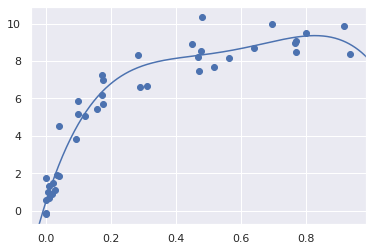

In [95]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim)